# Fibonacci Function Using Golden Ratio

First, let's define the Golden Ratio version of the Fibonacci Function:

## $F_{n} = \frac{(\Phi^n - (\Phi - 1)^n)}{\sqrt{5}}$

where $\Phi$ represents the [Golden Ratio](https://en.wikipedia.org/wiki/Golden_ratio):

## $\Phi = \frac{\sqrt{5} + 1}{2} =$

In [1]:
Phi = (5**0.5 + 1) / 2
Phi

1.618033988749895

Turning this into a function:

In [35]:
# Fibonacci using the golden ratio (phi)
def fib_phi(n):
    from decimal import Decimal
    if n == 0:
        return 0
    if n == 1:
        return 1
    
    phi = (Decimal.sqrt(Decimal(5)) + Decimal(1)) / Decimal(2)
    tau = Decimal(1) / phi
    decimal.getcontext().rounding = getattr(decimal, 'ROUND_05UP')
    return round(phi**Decimal(n) - tau**Decimal(n)) / Decimal.sqrt(Decimal(5))

So, for a quick demonstration:

In [36]:
for n in range(1, 20):
    print("n = {}\t\tFib({}) = {}".format(n, n, round(fib_phi(n))))

n = 1		Fib(1) = 1
n = 2		Fib(2) = 1
n = 3		Fib(3) = 2
n = 4		Fib(4) = 3
n = 5		Fib(5) = 5
n = 6		Fib(6) = 8
n = 7		Fib(7) = 13
n = 8		Fib(8) = 21
n = 9		Fib(9) = 34
n = 10		Fib(10) = 55
n = 11		Fib(11) = 89
n = 12		Fib(12) = 144
n = 13		Fib(13) = 233
n = 14		Fib(14) = 377
n = 15		Fib(15) = 610
n = 16		Fib(16) = 987
n = 17		Fib(17) = 1597
n = 18		Fib(18) = 2584
n = 19		Fib(19) = 4181


By default, the `Decimal` object is set to 28 digits of precision, which starts to fall apart around the 130th Fibonacci term.

We can see that with:

In [38]:
for n in range(130, 140):
    print("{} - {}".format(n, round(fib_phi(n))))

130 - 659034621587630041982498195
131 - 1066340417491710595814572136
132 - 1725375039079340637797070331
133 - 2791715456571051233611642468
134 - 4517090495650391871408712792
135 - 7308805952221443105020355263
136 - 11825896447871834976429068060
137 - 19134702400093278081449423310
138 - 30960598847965113057878491370
139 - 50095301248058391139327914620


136 and 137 both have zeros for least significant digits, meaning that digit will _always_ be zero from here on out, which simply doesn't make sense.  We can prove that by increasing the precision of `Decimal`:

In [40]:
import decimal

def set_precision(precision):
    decimal.getcontext().prec = precision
    return


def get_precision():
    return decimal.getcontext().prec


for n in range(130, 140):
    # use 28 digits precision
    set_precision(28)
    f1 = round(fib_phi(n))

    # use 29 digits precision
    set_precision(29)
    f2 = round(fib_phi(n))

    print("{} - {} - {}".format(n, f1, f2))


130 - 659034621587630041982498195 - 659034621587630041982498211
131 - 1066340417491710595814572136 - 1066340417491710595814572163
132 - 1725375039079340637797070331 - 1725375039079340637797070375
133 - 2791715456571051233611642468 - 2791715456571051233611642538
134 - 4517090495650391871408712792 - 4517090495650391871408712912
135 - 7308805952221443105020355263 - 7308805952221443105020355449
136 - 11825896447871834976429068060 - 11825896447871834976429068361
137 - 19134702400093278081449423310 - 19134702400093278081449423811
138 - 30960598847965113057878491370 - 30960598847965113057878492171
139 - 50095301248058391139327914620 - 50095301248058391139327915976


Even by the 130th term, the values differ.  This begs the question "How many digits precision is required to accurately determine the `n`th Fibonnaci number? Let's find out:

In [42]:
for prec in range(28, 48):
    broke = False

    for n in range(100, 200):
        set_precision(prec)
        f1 = round(fib_phi(n))

        set_precision(prec + 1)
        f2 = round(fib_phi(n))

        if f1 != f2:
            print("{} bit precision fails at #{}: {} - {} ".format(prec, n, f1, f2))
            broke = True
            break
    
    if not broke:
        print("Reached max value of n without failing with {} bit precision".format(prec))


28 bit precision fails at #124: 36726740705505779255899442 - 36726740705505779255899443 
29 bit precision fails at #127: 155576970220531065681649692 - 155576970220531065681649693 
30 bit precision fails at #132: 1725375039079340637797070383 - 1725375039079340637797070384 
31 bit precision fails at #138: 30960598847965113057878492345 - 30960598847965113057878492344 
32 bit precision fails at #142: 212207101440105399533740733470 - 212207101440105399533740733471 
33 bit precision fails at #149: 6161314747715278029583501626150 - 6161314747715278029583501626149 
34 bit precision fails at #154: 68330027629092351019822533679446 - 68330027629092351019822533679447 
35 bit precision fails at #158: 468340976726457153752543329995928 - 468340976726457153752543329995929 
36 bit precision fails at #162: 3210056809456107725247980776292057 - 3210056809456107725247980776292056 
37 bit precision fails at #165: 13598018856492162040239554477268289 - 13598018856492162040239554477268290 
38 bit precision fai

Feel free to play around with the ranges, they were arbitrary to get a feel for the data.  Time to have some fun.

Let's populate a dataframe with some data records.  Each record will contain:

- `prec` &mdash; Number of bits precision
- `n` &mdash; The value fed to `fib_phi()` that produces an inaccurate/inconsistent answer at the given precision
- `fib_n` &mdash; The actual value produced
- `fib_n_1` &mdash; The value of `fib_phi(n-1)` as comparison

First, we need `Pandas`.  If you don't have it installed already, no worries.  You can install it from within this notebook like so:

In [7]:
!pip install pandas

You are using pip version 18.0, however version 21.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Then go ahead and use it.  First, update `fib_phi` to accept an optional `precision` parameter:

In [43]:
# Fibonacci using the golden ratio (phi)
def fib_phi(n, precision=None):
    from decimal import Decimal
    if n == 0:
        return 0
    if n == 1:
        return 1

    old_prec = get_precision()    
    if precision is not None:
        set_precision(precision)

    phi = (Decimal.sqrt(Decimal(5)) + Decimal(1)) / Decimal(2)
    tau = Decimal(1) / phi
    decimal.getcontext().rounding = getattr(decimal, 'ROUND_05UP')
    fib = round((phi**Decimal(n) - tau**Decimal(n)) / Decimal.sqrt(Decimal(5)))

    if precision is not None:
        set_precision(old_prec)

    return fib

In [44]:
class fib_rec:
    precision = None
    n = None
    fibn = None
    fib2 = None
    
    def __init__(self, precision, n, fibn, fib2):
        self.precision = precision
        self.n = n
        self.fibn = fibn
        self.fib2 = self.fib2

In [45]:
import pandas as pd

def build_dataset(prec_low=1, prec_high=25):
    dataset = []
    for prec in range(prec_low, prec_high):
        n = 1
        while True:
            ( f1, f2 ) = ( fib_phi(n, prec), fib_phi(n, prec+1) )
            if f1 != f2:
                dataset.append( (prec, n, f1 - f2, f1, f2) )
                # print("break at n = {} for prec = {}".format(n, prec))
                break
            n += 1    
    return dataset

dataset = build_dataset(1, 50)
labels = ['precision', 'n', 'delta', 'Fib(n,prec)', 'Fib(n,prec+1)']

In [46]:
df = pd.DataFrame(dataset, columns=labels)

df

,precision,n,delta,"Fib(n,prec)","Fib(n,prec+1)"
0,1,2,-1,0,1
1,2,6,-1,7,8
2,3,11,1,90,89
3,4,15,-1,609,610
4,5,16,1,988,987
5,6,21,-1,10945,10946
6,7,31,-1,1346268,1346269
7,8,33,1,3524579,3524578
8,9,37,1,24157818,24157817
9,10,38,-1,39088168,39088169


In [47]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches

%matplotlib inline

<AxesSubplot:xlabel='precision', ylabel='n'>

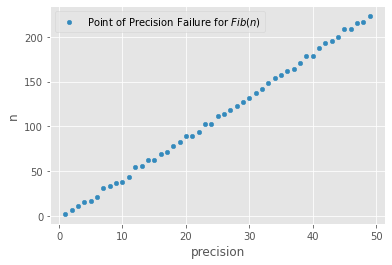

In [48]:
df2 = df[df.columns[[0,1]]]
df2.plot(x="precision", y="n", kind="scatter", label="Point of Precision Failure for $Fib(n)$")

Let's kick things up and look at twice that many precision bits:

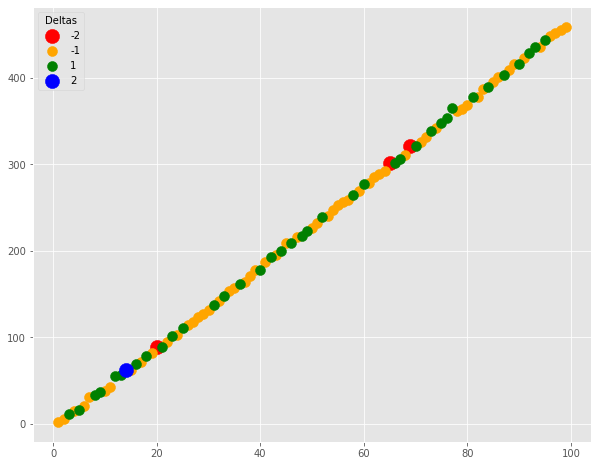

In [49]:
df3 = pd.DataFrame(build_dataset(1, 100), columns=labels)
colors = ['red', 'orange', '', 'green', 'blue']

fig, ax = plt.subplots(figsize=(10,8))

for name, group in df3.groupby('delta'):
    ax.scatter(x="precision", y="n", data=group, label=name, s=100 * abs(int(name)), c=colors[int(name)+2], vmin=0)

ax.legend(title="Deltas")

Take the code above, and _function-ize_ it for easy re-use:

In [50]:
def fib_phi_round(n, precision=None):
    from decimal import Decimal
    if n == 0:
        return 0
    if n == 1:
        return 1

    old_prec = get_precision()    
    if precision is not None:
        set_precision(precision)

    decimal.getcontext().rounding = getattr(decimal, "ROUND_UP")
    phi = (Decimal.sqrt(Decimal(5)) + Decimal(1)) / Decimal(2)
    tau = Decimal(1) / phi
    fib = round((phi**Decimal(n) - tau**Decimal(n)) / Decimal.sqrt(Decimal(5)))

    if precision is not None:
        set_precision(old_prec)

    return fib    


def fib_phi_ceiling(n, precision=None):
    from decimal import Decimal
    import decimal
    import math

    if n == 0:
        return 0
    if n == 1:
        return 1
    
    old_prec = get_precision()    
    if precision is not None:
        set_precision(precision)

    decimal.getcontext().rounding = getattr(decimal, "ROUND_CEILING")
    phi = (Decimal.sqrt(Decimal(5)) + Decimal(1)) / Decimal(2)
    tau = Decimal(1) / phi
    fib = math.ceil((phi**Decimal(n) - tau**Decimal(n)) / Decimal.sqrt(Decimal(5)))

    if precision is not None:
        set_precision(old_prec)

    return fib

def fib_phi_floor(n, precision=None):
    from decimal import Decimal
    import math

    if n == 0:
        return 0
    if n == 1:
        return 1
    
    old_prec = get_precision()    
    if precision is not None:
        set_precision(precision)

    decimal.getcontext().rounding = getattr(decimal, "ROUND_FLOOR")
    phi = (Decimal.sqrt(Decimal(5)) + Decimal(1)) / Decimal(2)
    tau = Decimal(1) / phi
    fib = math.floor((phi**Decimal(n) - tau**Decimal(n)) / Decimal.sqrt(Decimal(5)))

    if precision is not None:
        set_precision(old_prec)

    return fib

def build_dataset(prec_low=1, prec_high=25, type="round"):
    dataset = []
    for prec in range(prec_low, prec_high):
        n = 1
        while True:
            f1 = eval("fib_phi_{}(n, prec)".format(type))
            f2 = eval("fib_phi_{}(n, prec+1)".format(type))
            # ( f1, f2 ) = eval("( fib_phi_{}(n, prec), fib_phi_{}(n, prec+1) )".format(type, type))
            if f1 != f2:
                dataset.append( (prec, n, f1 - f2, f1, f2) )
                # print("break at n = {} for prec = {}".format(n, prec))
                break
            n += 1
    return dataset


def fib_precision_plot(low_prec=1, high_prec=30, fn="round"):
    df3 = pd.DataFrame(build_dataset(low_prec, high_prec, fn), columns=labels)

    colors = ['red', 'orange', '', 'orange', 'red']

    plt.style.use('ggplot')

    fig, ax = plt.subplots(figsize=(10,8))
    ax.set_xlim(low_prec, high_prec)
    ax.set_ylim(1, df3['n'].max())
    ax.set_xlabel("# Digits Precision")
    ax.set_ylabel("n where Fib(n) fails")

    for name, group in df3.groupby('delta'):
        ax.set_title("Affect of Precision on fib_phi(n) Failure")
        ax.scatter(x="precision", y="n", data=group, label=name, s=100 * abs(int(name)), c=colors[int(name)+2], alpha=0.5)

    ax.legend(title="Deltas")

    return df3

Setting the alpha to half (0.5) allows for some blending in the overlap:

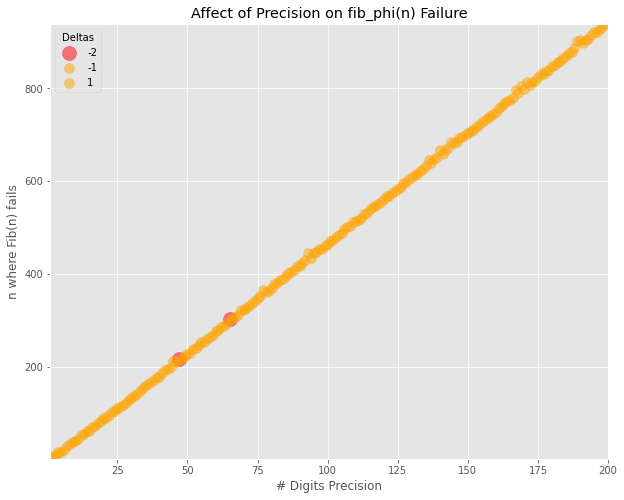

In [51]:
d1 = fib_precision_plot(1, 200) # default = "round"

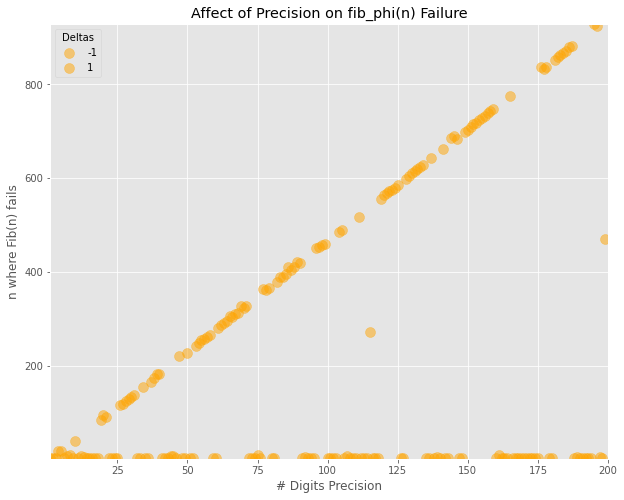

In [52]:
d1 = fib_precision_plot(1, 200, 'floor')

In [54]:
#d1 = fib_precision_plot(1, 200, 'ceiling')